#### **Найти решение дифференциального уравнения:** ####

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Выпишем условия данных функций для работы и последующей проверки:

In [15]:
def check_f(x):
    return 8 * x ** 2 + 4 * x + 5 + np.sin(3 * x)

def df_dx(x):
    return 16 * x + 4 + 3 * np.cos(3 * x)

Простой и модифицированный методы Эйлера:

In [16]:
def Euler(n, x0=0, y0=0, h=0.1):
    for _ in range(n):
        y0 += h * df_dx(x0)
        x0 += h

    return y0

def mod_Euler(n, x0=0, y0=0, h=0.1):
    for _ in range(n):
        y0 += h * (df_dx(x0) + df_dx(x0 + h)) / 2
        x0 += h

    return y0


Проверим метод, сравнив его с оригинальной функцией и прибавив константу, которая пропадает при дифференцировании, но есть в оригинальной функции:

In [17]:
print(check_f(0.4))
print(Euler(4) + 5)
print(mod_Euler(4) + 5)

8.812039085967227
8.580684621691784
8.805038284863286


In [18]:
yi_e, yi_mod = 0, 0
y_test_e, y_test_mod = [], []

for i in np.arange(0, 1, 0.1):
    y_test_e.append(yi_e)
    y_test_mod.append(yi_mod)
    
    yi_e = Euler(1, x0=i, y0=yi_e)
    yi_mod = mod_Euler(1, x0=i, y0=yi_mod)

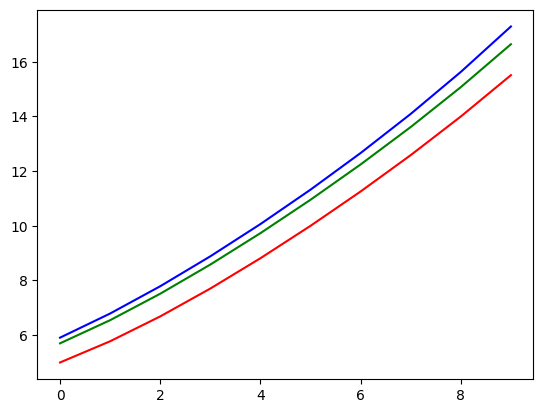

In [19]:
x_test = np.arange(0, 1, 0.1)

plt.plot(check_f(x_test), color='red')
plt.plot(Euler(1, x0=x_test, y0=y_test_e) + 5, color='green')
plt.plot(mod_Euler(1, x0=x_test, y0=y_test_mod) + 5, color='blue')

plt.show()

#### <font color='red'> **Почему метод Эйлера лучше модифицированого?** </font> ####

Создадим таблицу для проверки качества метода:

In [31]:
data = pd.DataFrame(np.array([[abs(Euler(i) - Euler(i * 2)) for i in [2 ** j for j in range(2, 6)]],
                            [abs(Euler(i * 2) - Euler(i * 4)) / abs(Euler(i) - Euler(i * 2)) for i in [2 ** j for j in range(2, 6)]], 
                            [abs(mod_Euler(i) - mod_Euler(i * 2)) for i in [2 ** j for j in range(2, 6)]], 
                            [abs(mod_Euler(i * 2) - mod_Euler(i * 4)) / abs(mod_Euler(i) - mod_Euler(i * 2)) for i in [2 ** j for j in range(2, 6)]]]).T, 
                    columns=['eps', 'P', 'eps_mod', 'P_mod'], 
                    index=[2 ** i for i in range(2, 6)])
data

,eps,P,eps_mod,P_mod
4,5.030314,3.207989,5.185351,3.259360
8,16.137194,4.185145,16.900928,4.062242
16,67.536493,3.793877,68.655665,3.773523
32,256.225167,3.917826,259.073754,3.894410


Метод расходится, так как шаг в методе Эйлера взят слишком большим.